In [39]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'shirts'],
              ['red', 'L', 13.5, 'hat'],
              ['blue', 'XL', 15.3, 'shirts']],
              columns=['color', 'size', 'price', 'category'])
df

,color,size,price,category
0,green,M,10.1,shirts
1,red,L,13.5,hat
2,blue,XL,15.3,shirts


In [40]:
df_ = df.copy()
df_['category'] = df['category'].map({'shirts':0, 'hat':1})
df_

,color,size,price,category
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [41]:
from sklearn.preprocessing import LabelEncoder

df_ = df.copy()
le = LabelEncoder()
df_['category'] = le.fit_transform(df_['category'].values)
df_

,color,size,price,category
0,green,M,10.1,1
1,red,L,13.5,0
2,blue,XL,15.3,1


In [42]:
le.inverse_transform([0,0,1,0,1,1])

array(['hat', 'hat', 'shirts', 'hat', 'shirts', 'shirts'], dtype=object)

In [43]:
df_['size'] = df_['size'].map({'M':0, 'L':1, 'XL':2})
df_

,color,size,price,category
0,green,0,10.1,1
1,red,1,13.5,0
2,blue,2,15.3,1


# 원핫인코딩

In [33]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(df_['color'].values.reshape(-1,1))   # sparse없으면 .toarray() 해야 출력됨

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

### 매핑하고 다 한 다음, 원핫인코딩 할 열들만 남겨두고 get_dummies

In [45]:
pd.get_dummies(df_.iloc[:,:-1])
X_df = pd.get_dummies(df_.iloc[:,:-1], drop_first=True)
X_df

,size,price,color_green,color_red
0,0,10.1,True,False
1,1,13.5,False,True
2,2,15.3,False,False


In [55]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
X1 = std_scaler.fit_transform(X_df.loc[:,['price']])
# std_scaler.fit_transform(X_df['price'].values.reshape(-1,1)) #(열이 하나일때만)

mm_scaler = MinMaxScaler()
X2 = mm_scaler.fit_transform(X_df.loc[:, ['size']])

X3 = X_df.iloc[:, 2:].values

X = np.concatenate([X1, X2, X3], axis=-1)
X

array([[-1.32954369,  0.        ,  1.        ,  0.        ],
       [ 0.24735697,  0.5       ,  0.        ,  1.        ],
       [ 1.08218672,  1.        ,  0.        ,  0.        ]])

In [70]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=5, weights=[0.99], flip_y=0, random_state=1)

In [71]:
np.unique(y, return_counts=True)

(array([0, 1]), array([9900,  100], dtype=int64))

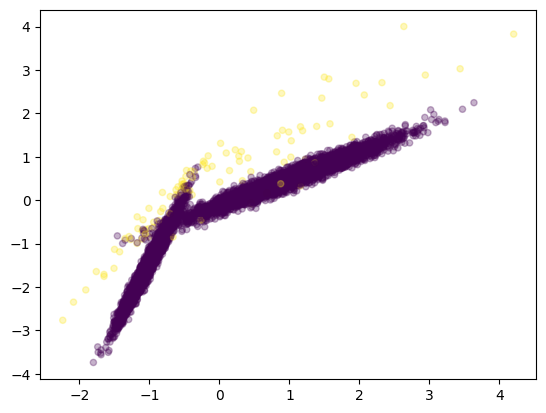

In [73]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, alpha=0.3)
plt.show()

# 언더샘플링, 많은 쪽을 적은 쪽에 맞춘다

(array([0, 1]), array([100, 100], dtype=int64))


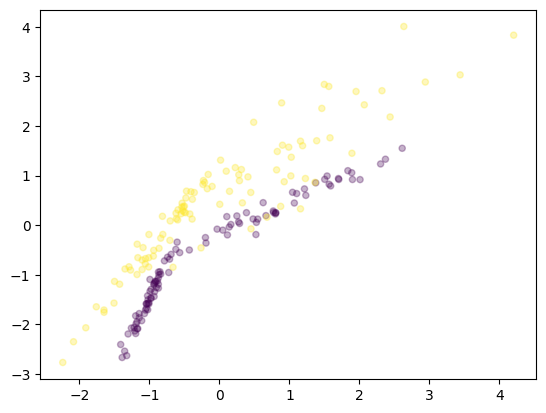

In [75]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(sampling_strategy='majority')
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts=True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c=y_sp, s=20, alpha=0.3)
plt.show()

(array([0, 1]), array([500, 100], dtype=int64))


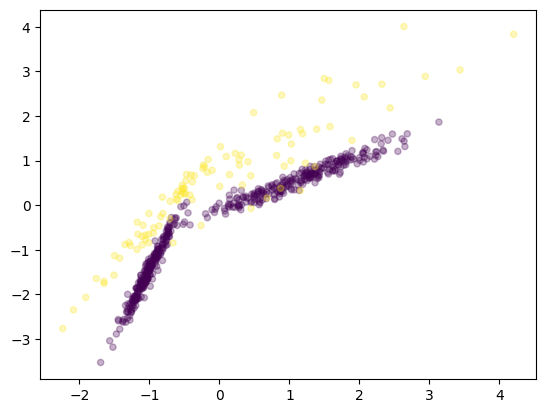

In [80]:
sampler = RandomUnderSampler(sampling_strategy=0.2)
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts=True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c=y_sp, s=20, alpha=0.3)
plt.show()

# 오버샘플링, 적은 쪽을 많은 쪽으로 맞춘다

(array([0, 1]), array([9900, 9900], dtype=int64))


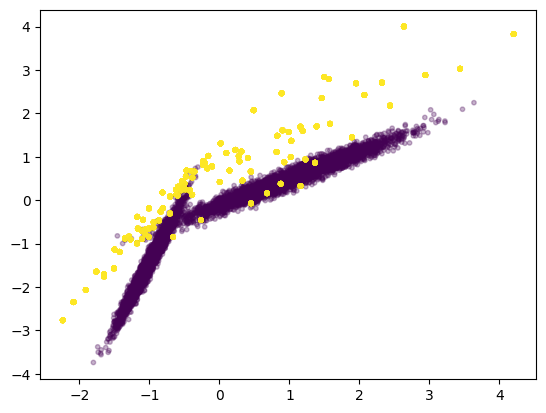

In [83]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

sampler = RandomOverSampler(sampling_strategy='minority')
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts=True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c=y_sp, s=10, alpha=0.3)
plt.show()

(array([0, 1]), array([9900, 4950], dtype=int64))


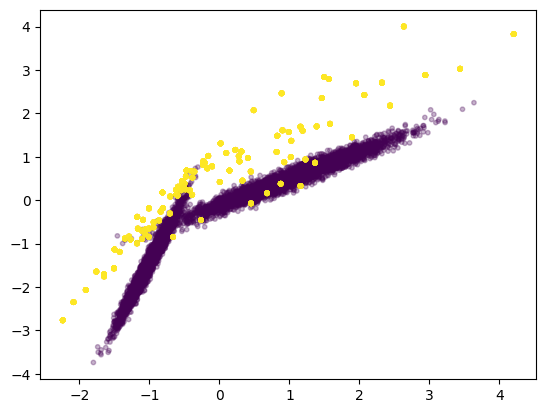

In [84]:
sampler = RandomOverSampler(sampling_strategy=0.5)
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts=True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c=y_sp, s=10, alpha=0.3)
plt.show()

# SMOTE , 보간해서 majority에 맞춘다
### 보간을 하기 때문에 예의 size나 color의 인코딩값이 더 생기기 때문에 조심해야 한다.

(array([0, 1]), array([9900, 9900], dtype=int64))


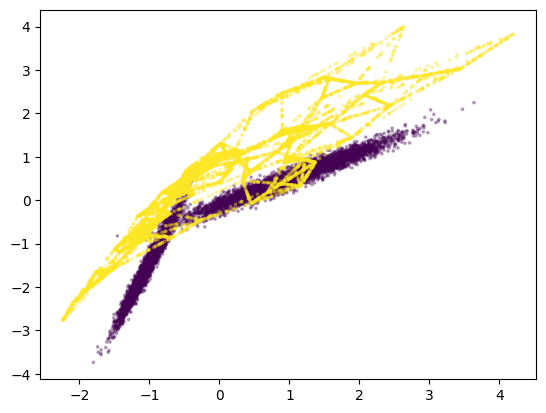

In [87]:
sampler = SMOTE(sampling_strategy='minority')
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts=True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c=y_sp, s=3, alpha=0.3)
plt.show()

(array([0, 1]), array([9900, 1980], dtype=int64))


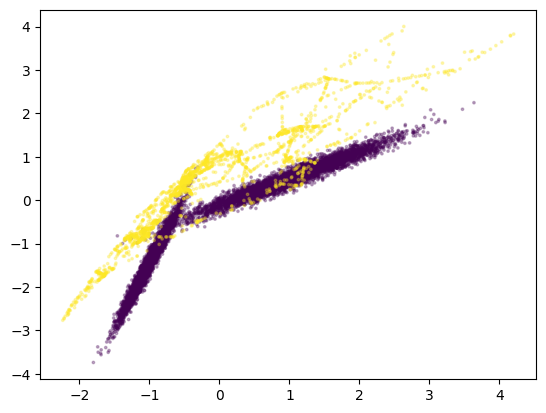

In [89]:
sampler = SMOTE(sampling_strategy=0.2)
X_sp, y_sp = sampler.fit_resample(X, y)

print(np.unique(y_sp, return_counts=True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c=y_sp, s=3, alpha=0.3)
plt.show()

In [153]:
app = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [154]:
credit['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [155]:
credit['STATUS'] = credit['STATUS'].map({'C':0, '0':0, 'X':0, '1':0, '2':1, '3':1, '4':1, '5':1})
credit['STATUS'].value_counts()

STATUS
0    1045471
1       3104
Name: count, dtype: int64

In [156]:
df = pd.merge(credit, app, on='ID')
df.drop(['OCCUPATION_TYPE'], axis=1, inplace=True)

In [157]:
df['CODE_GENDER'] = df['CODE_GENDER'].map({'M':0, 'F':1})
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'N':0, 'Y':1})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'N':0, 'Y':1})
df

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008804,-1,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008804,-2,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
3,5008804,-3,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
4,5008804,-4,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,2.0
777711,5150487,-26,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,2.0
777712,5150487,-27,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,2.0
777713,5150487,-28,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,2.0


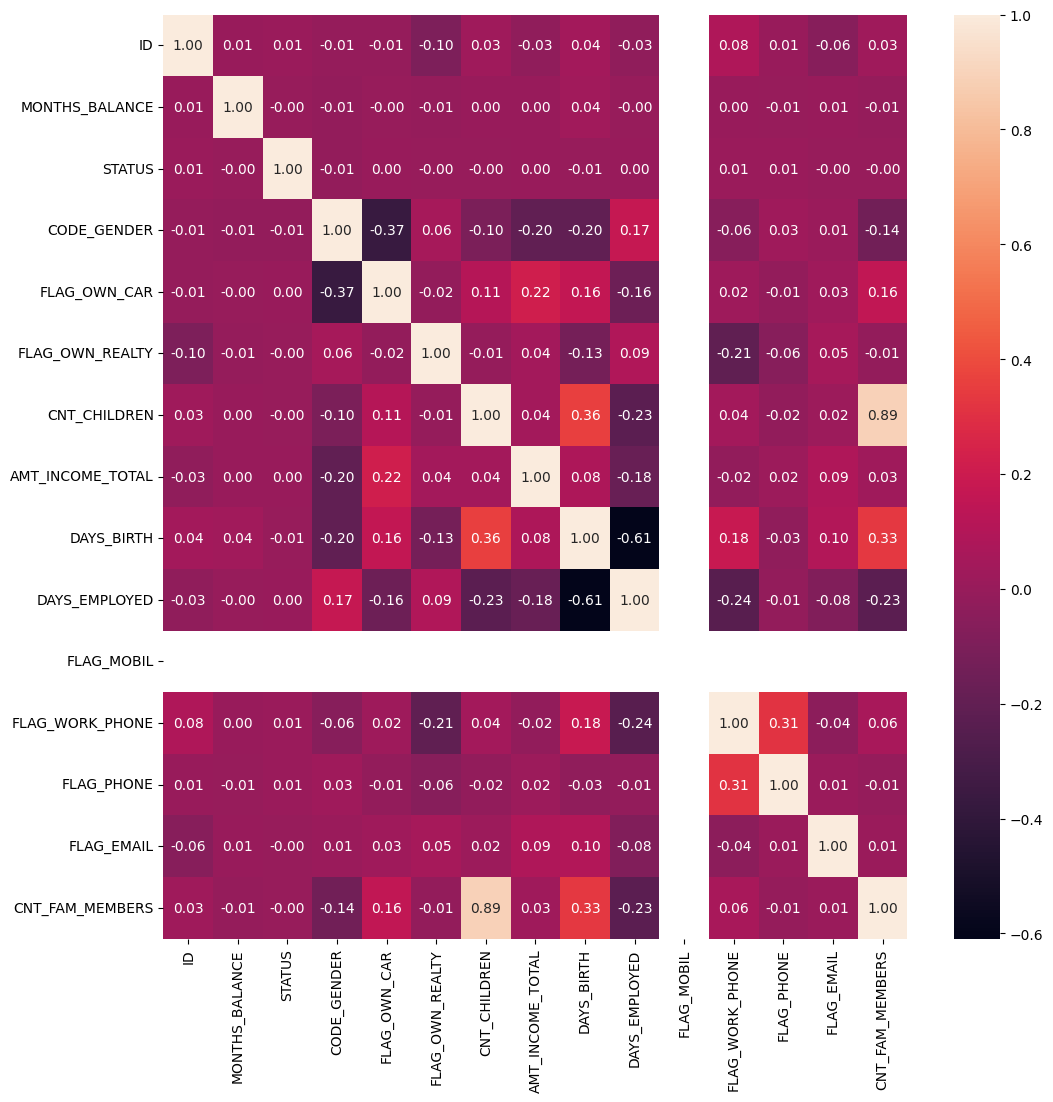

In [159]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [180]:
df

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008804,-1,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008804,-2,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
3,5008804,-3,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
4,5008804,-4,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,2.0
777711,5150487,-26,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,2.0
777712,5150487,-27,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,2.0
777713,5150487,-28,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,2.0


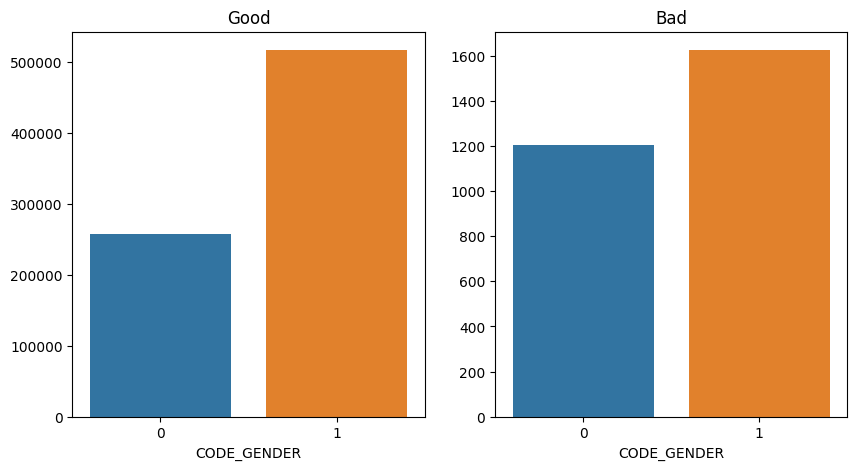

In [179]:
# 'status'가 0인 행만 선택해서, 'gender'별로 갯수를 세어 봅니다.
status_0 = df[df['STATUS'] == 0]['CODE_GENDER'].value_counts()

# 'status'가 1인 행만 선택해서, 'gender'별로 갯수를 세어 봅니다.
status_1 = df[df['STATUS'] == 1]['CODE_GENDER'].value_counts()

# 두 개의 bar plot을 그립니다.
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x=status_0.index, y=status_0.values, ax=axs[0])
sns.barplot(x=status_1.index, y=status_1.values, ax=axs[1])

# 그래프 제목을 설정합니다.
axs[0].set_title('Good')
axs[1].set_title('Bad')

plt.show()

<Figure size 1000x600 with 0 Axes>

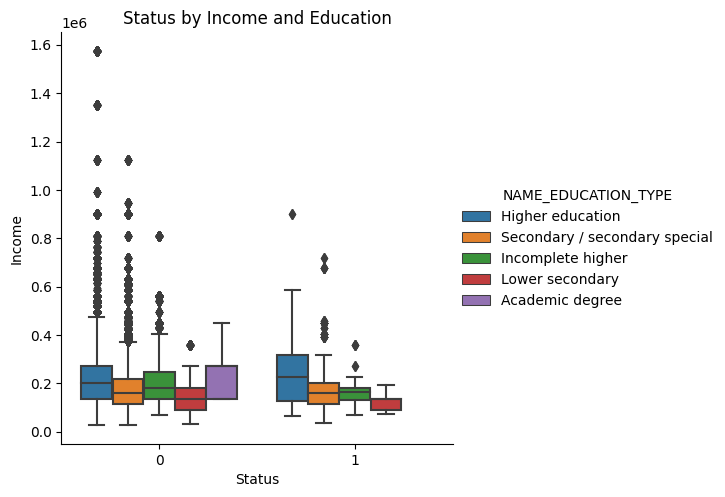

In [185]:
plt.figure(figsize=(10, 6))
sns.catplot(x='STATUS', y='AMT_INCOME_TOTAL', hue='NAME_EDUCATION_TYPE', kind="box", data=df)
plt.title('Status by Income and Education')
plt.xlabel('Status')
plt.ylabel('Income')
plt.show()

In [241]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'] / 365
df

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,income_category
0,5008804,0,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,0.000123,-4542,1,1,0,0,2.0,Q4
1,5008804,-1,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,0.000123,-4542,1,1,0,0,2.0,Q4
2,5008804,-2,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,0.000123,-4542,1,1,0,0,2.0,Q4
3,5008804,-3,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,0.000123,-4542,1,1,0,0,2.0,Q4
4,5008804,-4,0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,0.000123,-4542,1,1,0,0,2.0,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,0.000199,-2166,1,0,0,0,2.0,Q3
777711,5150487,-26,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,0.000199,-2166,1,0,0,0,2.0,Q3
777712,5150487,-27,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,0.000199,-2166,1,0,0,0,2.0,Q3
777713,5150487,-28,0,0,1,0,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,0.000199,-2166,1,0,0,0,2.0,Q3


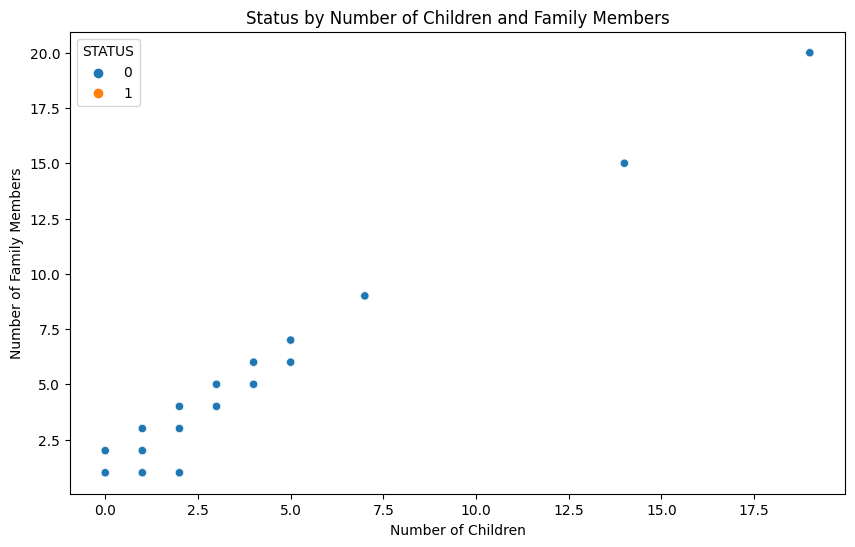

In [186]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CNT_CHILDREN', y='CNT_FAM_MEMBERS', hue='STATUS', data=df)
plt.title('Status by Number of Children and Family Members')
plt.xlabel('Number of Children')
plt.ylabel('Number of Family Members')
plt.show()


In [187]:
df['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: count, dtype: int64

In [198]:
df[(df['CNT_CHILDREN'] >= 2)]['STATUS'].value_counts()

STATUS
0    81209
1      229
Name: count, dtype: int64

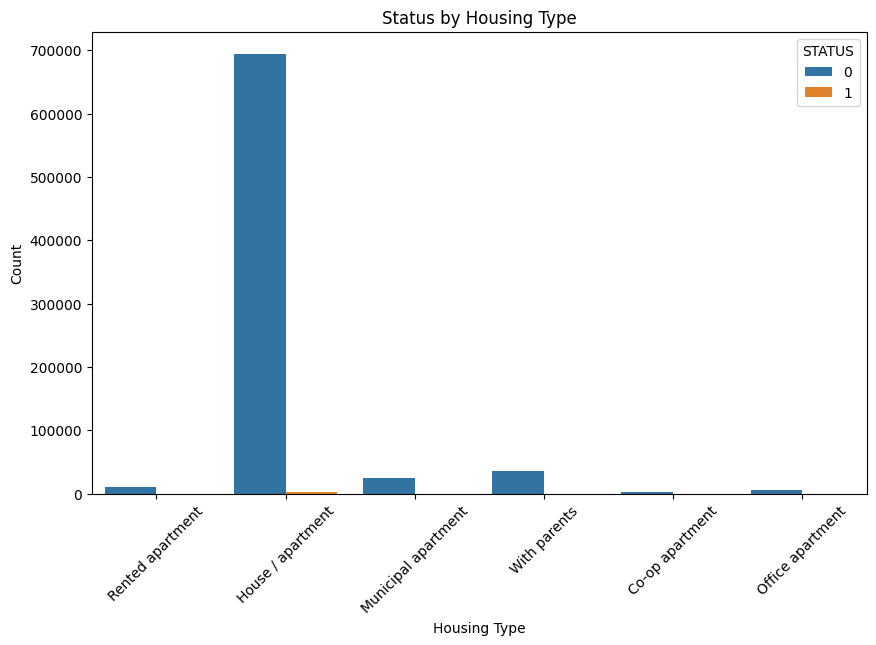

In [205]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_HOUSING_TYPE', hue='STATUS', data=df)
plt.title('Status by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [222]:
fin = df[['ID', 'STATUS', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']]
fin

,ID,STATUS,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE
0,5008804,0,427500.0,Working,0,Higher education,Rented apartment
1,5008804,0,427500.0,Working,0,Higher education,Rented apartment
2,5008804,0,427500.0,Working,0,Higher education,Rented apartment
3,5008804,0,427500.0,Working,0,Higher education,Rented apartment
4,5008804,0,427500.0,Working,0,Higher education,Rented apartment
...,...,...,...,...,...,...,...
777710,5150487,0,202500.0,Working,0,Secondary / secondary special,House / apartment
777711,5150487,0,202500.0,Working,0,Secondary / secondary special,House / apartment
777712,5150487,0,202500.0,Working,0,Secondary / secondary special,House / apartment
777713,5150487,0,202500.0,Working,0,Secondary / secondary special,House / apartment


In [223]:
fin.loc[:, 'NAME_INCOME_TYPE'] = fin['NAME_INCOME_TYPE'].map({'Working':0, 'Commercial associate':1, 'Pensioner':2, 'State servant':3, 'Student':4})
fin

,ID,STATUS,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE
0,5008804,0,427500.0,0,0,Higher education,Rented apartment
1,5008804,0,427500.0,0,0,Higher education,Rented apartment
2,5008804,0,427500.0,0,0,Higher education,Rented apartment
3,5008804,0,427500.0,0,0,Higher education,Rented apartment
4,5008804,0,427500.0,0,0,Higher education,Rented apartment
...,...,...,...,...,...,...,...
777710,5150487,0,202500.0,0,0,Secondary / secondary special,House / apartment
777711,5150487,0,202500.0,0,0,Secondary / secondary special,House / apartment
777712,5150487,0,202500.0,0,0,Secondary / secondary special,House / apartment
777713,5150487,0,202500.0,0,0,Secondary / secondary special,House / apartment


In [224]:
fin.loc[:, 'NAME_EDUCATION_TYPE'] = fin['NAME_EDUCATION_TYPE'].map({'Secondary / secondary special':0, 'Higher education':1, 'Incomplete higher':2,
                                 'Lower secondary':3, 'Academic degree':4})
fin

,ID,STATUS,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE
0,5008804,0,427500.0,0,0,1,Rented apartment
1,5008804,0,427500.0,0,0,1,Rented apartment
2,5008804,0,427500.0,0,0,1,Rented apartment
3,5008804,0,427500.0,0,0,1,Rented apartment
4,5008804,0,427500.0,0,0,1,Rented apartment
...,...,...,...,...,...,...,...
777710,5150487,0,202500.0,0,0,0,House / apartment
777711,5150487,0,202500.0,0,0,0,House / apartment
777712,5150487,0,202500.0,0,0,0,House / apartment
777713,5150487,0,202500.0,0,0,0,House / apartment


In [225]:
fin.loc[:, 'NAME_HOUSING_TYPE'] = fin['NAME_HOUSING_TYPE'].map({'House / apartment':0, 'With parents':1, 'Municipal apartment':2, 
                              'Rented apartment':3, 'Office apartment':4, 'Co-op apartment':5})
fin

,ID,STATUS,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE
0,5008804,0,427500.0,0,0,1,3
1,5008804,0,427500.0,0,0,1,3
2,5008804,0,427500.0,0,0,1,3
3,5008804,0,427500.0,0,0,1,3
4,5008804,0,427500.0,0,0,1,3
...,...,...,...,...,...,...,...
777710,5150487,0,202500.0,0,0,0,0
777711,5150487,0,202500.0,0,0,0,0
777712,5150487,0,202500.0,0,0,0,0
777713,5150487,0,202500.0,0,0,0,0


In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

wine = load_wine()
X = fin.iloc[:, 2:]
y = fin.iloc[:, 1]

forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X, y)

RandomForestClassifier(random_state=1)

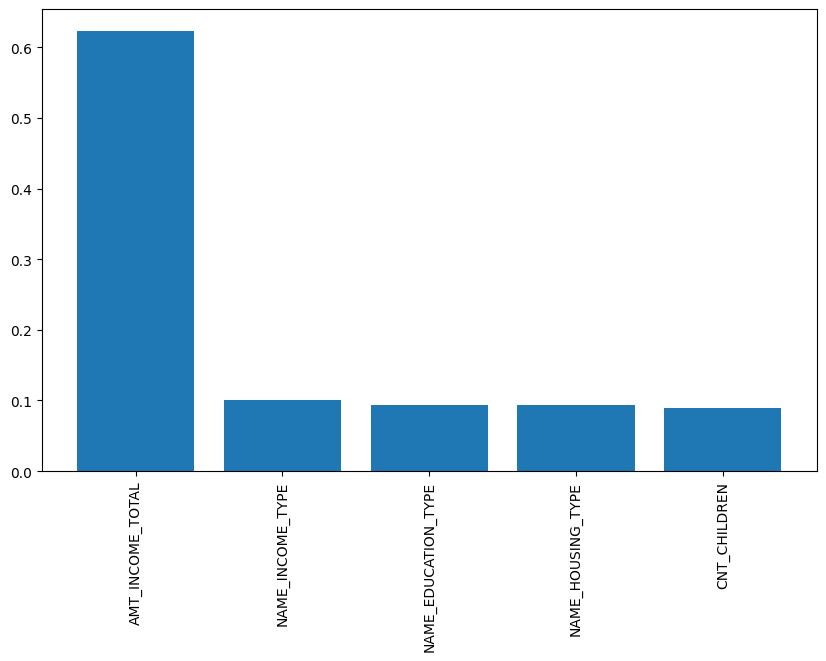

In [231]:
ipt = forest.feature_importances_
idxs = np.argsort(ipt)[::-1] # 역순

plt.figure(figsize=(10,6))
plt.bar(np.array(fin.iloc[:, 2:].columns)[idxs], ipt[idxs]) # ipt[idxs 중요도
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)



# 순서대로
lr_pipe = make_pipeline(StandardScaler(), 
                        KernelPCA(n_components=2), 
                        SVC(solver='liblinear', random_state=1))
# lr_pipe.fit(X_train, y_train)
# lr_pipe.predict(X_test)
cvscore = cross_val_score(estimator=lr_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1) # 10조각(kfold)
print('\n교자검증(CV) 정확도 : ', np.mean(cvscore))
for i, j in enumerate(cvscore):
    print(f'{i+1}번 : {j}')
